In [3]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
%matplotlib inline

bare quark mass without dimension: $\frac{m}{\Lambda}=\frac{2.177 MeV}{891 MeV}$

unity of lenth without dimension: $fm\cdot\Lambda=\frac{891 MeV}{197.33 MeV}$

In [4]:
m=2.177/891 #m/lambda
fm=891/197.33 #lambda/197.33MeV
G=3.881

effective mass: $m^*(x,\phi)=m+\phi e^{-x^2}$

energy: $E(x,\phi)=\sqrt{x^2+m^{*2}(x,\phi)}$

In [5]:
def mstar(x,phi):
    M=m+phi*math.exp(-x*x)
    return M
def E(x,phi):
    E=math.sqrt(x*x+mstar(x,phi)*mstar(x,phi))
    return E
def Theta(x):
    if x>0:
        return 1
    else:
        return 0
def Log_p(x,phi,mu,T):
    L = 0
    if (T):
        e_p = math.exp(-(E(x,phi)+mu)/T)
        L += T*math.log(1+e_p)
    return L
def Log_m(x,phi,mu,T):
    if (T):
        e_m = math.exp(-(E(x,phi)-mu)/T)
        L = T*math.log(1+e_m)
    else:
        L=(mu-E(x,phi))*Theta(mu-E(x,phi))
    return L

$\frac{\phi}{2G}-\frac{6}{\pi^2}\int_0^\infty dx\frac{m^*(x,\phi)}{E(x,\phi)}x^2e^{-x^2}\{1-\frac{1}{1+e^(E-\mu)/T}-\frac{1}{1+e^{(E+\mu)/T}}\}$

$T\rightarrow 0$

$\frac{\phi}{2G}-\frac{6}{\pi^2}\int_0^\infty dxx^2e^{-x^2}\frac{m^*(x,\phi)}{E(x,\phi)}\{1-\Theta(E-\mu)-\Theta(-E-\mu)\}$

$\frac{\phi}{2G}-\frac{6}{\pi^2}\int_0^\infty dxx^2e^{-x^2}\frac{m^*(x,\phi)}{E(x,\phi)}\{1-\Theta(\mu-E)\}$

$||\frac{\partial \Omega}{\partial\phi}||=|\ \phi-\frac{12\cdot G}{\pi^2}\int_0^\infty\frac{m^*(x,\phi)}{E(x,\phi)}x^2e^{-x^2}\Theta(E-\mu)|$

In [69]:
def integrand(x,phi,mu,T):
    Func=12*G/math.pi/math.pi*x*x*math.exp(-x*x)*mstar(x,phi)/E(x,phi)
    if(T):
        Func*=(1-math.exp(-(E(x,phi)-mu)/T)/(math.exp(-(E(x,phi)-mu)/T)+1)-math.exp(-(E(x,phi)+mu)/T)/(math.exp(-(E(x,phi)+mu)/T)+1))
    else:
        Func*=Theta(E(x,phi)-mu)
    return Func
def D(phi,mu,T):
    N,err=integrate.quad(integrand,0,np.inf,args=(phi,mu,T))
    N=(phi-N)*Theta(phi)
    return N


In [83]:
def Phi(mu,T):
    phi=[0,0,0]
    z1=optimize.root(D,0.5,args=(mu,T), tol=1e-15)
    if (z1.x[0]>0)and(abs(D(z1.x[0],mu,T))<1e-5):
        phi[0]=z1.x[0]
    z2=optimize.root(D,0.3,args=(mu,T), tol=1e-15)
    if (z2.x[0]>0)and(abs(D(z2.x[0],mu,T))<1e-5):
        phi[1]=z2.x[0]
    else:
        phi[1]=phi[0]
    z3=optimize.root(D,0.001,args=(mu,T), tol=1e-15)
    if (z3.x[0]>0):#and(abs(D(z3.x[0],mu,T))<1e-5):
        phi[2]=z3.x[0]
    else:
        phi[2]=phi[1]
    if phi[2]:
        if phi[1]==0:
            phi[1]=phi[2]
        if phi[0]==0:
            phi[0]=phi[2]
    else:
        if phi[1]:
            phi[2]=phi[1]
            if phi[0]==0:
                phi[0]=phi[1]
        else:
            phi[1]=phi[0]
            phi[2]=phi[0]
    return phi

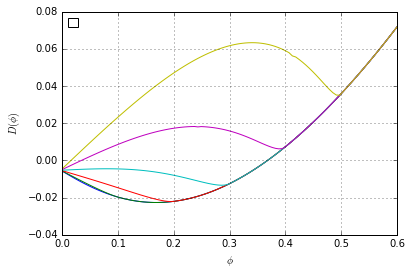

In [72]:
x_range=np.linspace(0.001,0.6,100)
plt.xlabel('$\phi$')
plt.ylabel('$D(\phi)$')
plt.legend(('$\mu=0.0$','$\mu=0.1$','$\mu=0.2$','$\mu=0.3$','$\mu=0.4$','$\mu=0.5$'),
           loc='upper left')
plt.grid(True)
for i in range(0,6):
    plt.plot(x_range, [D(phi,i/10,0) for phi in x_range])

I dunno whats problem with the legend.

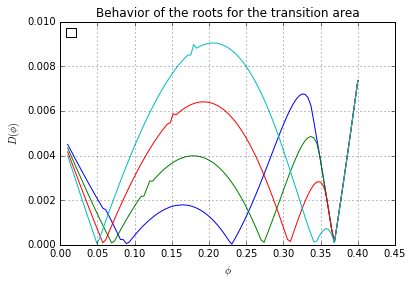

In [73]:
x_range=np.linspace(0.01,0.4,100)
plt.xlabel('$\phi$')
plt.ylabel('$D(\phi)$')
plt.title('Behavior of the roots for the transition area')
plt.legend(('$\mu=0.34$','$\mu=0.35$','$\mu=0.36$','$\mu=0.37$'),
           loc='upper left')

plt.grid(True)
for i in range(34,38):
    plt.plot(x_range, [abs(D(phi,i/100,0)) for phi in x_range])

[0, 0, 0.020555831078899987]

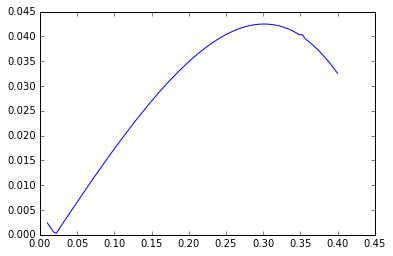

In [82]:
x_range=np.linspace(0.01,0.4,100)
plt.plot(x_range, [abs(D(phi,0.46,0)) for phi in x_range])
Phi(0.46,0)

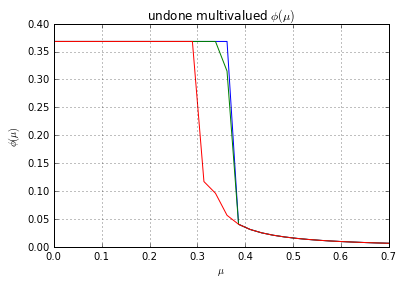

In [84]:
x_range=np.linspace(0,0.7,30)
plt.xlabel('$\mu$')
plt.ylabel('$\phi(\mu)$')
plt.title('undone multivalued $\phi(\mu)$')
plt.grid(True)
plt.plot(x_range,[Phi(mu,0) for mu in x_range])

$\Omega=\frac{\phi^2-\phi_0^2}{4G}-\frac6{\pi^2}\int_0^\infty x^2dx\{E(x,\phi)-E(x,\phi_0)+T\ln(1+e^{-\frac{E-\mu}T})+T\ln(1+e^{-\frac{E+\mu}T})\}$

$T\rightarrow 0$

$\Omega=\frac{\phi^2-\phi_0^2}{4G}-\frac6{\pi^2}\int_0^\infty x^2dx\{E(x,\phi)-E(x,\phi_0)+\Theta(\mu-E)(\mu-E)\}$

In [37]:
def Omega_T(mu,T):
    phi=Phi(mu,T)
    phi0=Phi(mu,0)
    Omega = (phi*phi-phi0*phi0)/4/G
    Integrand_1 = lambda x: (E(x,phi)-E(x,phi0))*x*x
    Int_1,err = integrate.quad(Integrand_1,0,np.inf)
    Omega -= 6/math.pi/math.pi*Int_1
    if (T):
        Integrand_2 = lambda x: (Log_m(x,phi,mu,T)+Log_p(x,phi,mu,T))*x*x
        Int_2,err = integrate.quad(Integrand_2,0,np.inf)
        Omega -= 6/math.pi/math.pi*Int_2
    return Omega